In [1]:
import os
import re
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def from_file_to_dict(file_path_name):
    tmp_dict = {}
    with open(file_path_name, 'r', encoding='utf8') as f:
        lines = f.readlines()
        for line in lines:
            k, v = line.strip('\n').split(',')
            tmp_dict[k] = int(v)
    return tmp_dict

In [3]:
# get current work directory
d = os.getcwd()
# get data directory
data_dir = path.join(d, '..', 'data')
# get mask directory
mask_dir = path.join(d, '..', 'mask')
# get output directory
out_dir = path.join(d, '..', 'out')
# get fon directory
font_dir = path.join(d, '..', 'font')

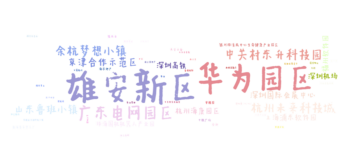

In [5]:
font = path.join(font_dir, 'hyxdlb.ttf')
mask = np.array(Image.open(path.join(mask_dir, 'mo_2.jpg')))
data = from_file_to_dict(path.join(data_dir, 'owner.txt'))
wc = WordCloud(font_path=font, mask=mask, background_color='white')
wc.generate_from_frequencies(data)
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file(path.join(out_dir, 'owner.png'))